In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [5]:
X_test.shape

(10000, 32, 32, 3)

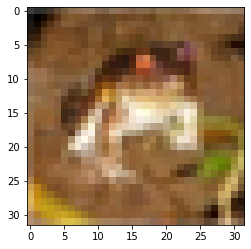

In [6]:
plt.imshow(X_train[0])

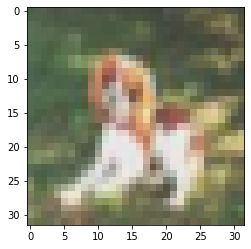

In [7]:
plt.imshow(X_train[1033])

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [9]:
Y_train = Y_train.reshape(-1,) #converts it into a 1-D array

In [10]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

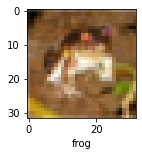

In [11]:
plot_sample(X_train, Y_train, 0)

In [12]:
X_train[0]
X_test = X_test / 255 #normalization of the values (0 -> 1)
X_train = X_train / 255

In [13]:
###Neural Network Time

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)), #Reads in a 32x32 pixel image in rgb
    layers.Dense(3000, activation = 'relu'),#Our first hidden layer which holds 3000 nodes using relu
    layers.Dense(1000, activation = 'relu'),#Second hidden layer
    layers.Dense(10, activation = 'sigmoid')#output layer, using 10 actiavtion nodes for the 10 different objects we are classifying
])

In [16]:
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.8132 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6241 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5417 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4829 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4327 - accuracy: 0.4949


In [17]:
ann.evaluate(X_test, Y_test)

313/313 [==============================] - 7s 20ms/step - loss: 1.4406 - accuracy: 0.4933


[1.4406311511993408, 0.4932999908924103]

In [18]:
#Our accuracy is hot garbage with a 10% accuracy, lets use CNN to improve the performance

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      1000
           1       0.61      0.64      0.62      1000
           2       0.39      0.32      0.35      1000
           3       0.34      0.27      0.30      1000
           4       0.45      0.39      0.42      1000
           5       0.33      0.51      0.40      1000
           6       0.49      0.60      0.54      1000
           7       0.62      0.48      0.54      1000
           8       0.66      0.58      0.62      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [22]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)), 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(), #Reads in a 32x32 pixel image in rgb
    layers.Dense(64, activation = 'relu'),#Our first hidden layer which holds 3000 nodes using relu
    layers.Dense(10, activation = 'softmax')#Output layter
])

In [23]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
cnn.fit(X_train, Y_train, epochs = 10) ##CNN is much better! wow

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4541 - accuracy: 0.4789
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1296 - accuracy: 0.6032
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0142 - accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9365 - accuracy: 0.6732
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8784 - accuracy: 0.6930
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8316 - accuracy: 0.7103
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7897 - accuracy: 0.7239
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7564 - accuracy: 0.7366
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7170 - accuracy: 0.7494
Epoch 10/10
1563/1563 [==============================] - 32s 20m

In [28]:
cnn.evaluate(X_test, Y_test) #We just built our first CNN

313/313 [==============================] - 2s 6ms/step - loss: 0.9102 - accuracy: 0.6952


[0.9102001786231995, 0.6952000260353088]

In [30]:
Y_test = Y_test.reshape(-1,)

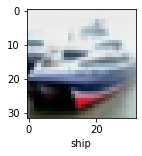

In [31]:
plot_sample(X_test, Y_test, 1)

In [33]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

array([[2.48609437e-03, 3.17943399e-04, 2.12295447e-03, 8.22774708e-01,
        4.06274572e-03, 1.42677113e-01, 1.24487234e-02, 8.78475793e-03,
        3.00896051e-03, 1.31596555e-03],
       [1.76812354e-02, 1.91927090e-01, 1.11049103e-05, 8.77901221e-06,
        5.74440719e-06, 8.41968362e-09, 1.31227278e-08, 8.56950564e-08,
        7.88719177e-01, 1.64677389e-03],
       [1.20819323e-01, 6.11376092e-02, 5.46603790e-03, 3.48070776e-03,
        5.11737773e-04, 1.80721632e-04, 4.67702892e-04, 2.90510652e-04,
        7.92056680e-01, 1.55890407e-02],
       [8.16487491e-01, 5.91142045e-04, 1.09063210e-02, 3.37671518e-04,
        3.04137226e-02, 1.79503932e-05, 1.42300105e-05, 6.54934905e-04,
        1.40269771e-01, 3.06750822e-04],
       [4.26683215e-07, 2.66049824e-06, 5.29356673e-03, 2.35960800e-02,
        1.01016052e-01, 6.83204446e-04, 8.68434727e-01, 2.27673136e-05,
        9.46662039e-04, 3.89889692e-06]], dtype=float32)

In [34]:
np.argmax([5, 12, 1, 2])

1

In [35]:
Y_classes = [np.argmax(element) for element in y_pred] #we get the value of the highest probability predicted
Y_classes[:5]

[3, 9, 8, 0, 4]

In [36]:
classes[Y_classes[100]]

'dog'

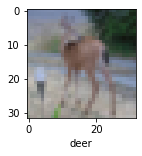

In [38]:
plot_sample(X_test, Y_test, 100) #gets this one wrong